In [1]:
import matplotlib.pyplot as plt
%matplotlib nbagg
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import os

sns.set_style('whitegrid')

In [2]:
def load_results(key):
    
    df = pd.read_json('../data/bb_{}.json'.format(key))
    df = df.append(pd.read_json('../data/iso_{}.json'.format(key)))
    df = df.append(pd.read_json('../data/marl_{}.json'.format(key)))
    
    return df

In [3]:
chordino = load_results('chordino')

In [4]:
dnn = load_results('dnn')

In [5]:
khmm = load_results('khmm')

In [6]:
cr1 = load_results('cr1')
cr1s = load_results('cr1s')
cr1si = load_results('cr1si')

In [7]:
cr2 = load_results('cr2')
cr2s = load_results('cr2s')
cr2si = load_results('cr2si')
cr2psi = load_results('cr2psi')

In [8]:
cr2npsi = load_results('cr2npsi')

In [9]:
cr2nsi = load_results('cr2nsi')

In [10]:
cr2tvsi = load_results('cr2tvsi')

In [11]:
results = pd.Panel({'Chordino': chordino,
                    'DNN': dnn,
                    'KHMM': khmm,
                    'CR1': cr1,  
                    'CR1+S': cr1s, 
                    'CR1+S+I': cr1si,
                    'CR2': cr2,
                    'CR2+S': cr2s,
                    'CR2+S+I': cr2si,
                    'CR2+P+S+I': cr2psi,
                    'CRN+I': cr2nsi,
                    'CRN+P+I': cr2npsi,
                    'CR2+TV+S+I': cr2tvsi
                   })

results_noinv = results[['CR2+S', 'CR2',
                         'CR1+S', 'CR1',
                         'KHMM', 'DNN']]#, 'Chordino']]

In [12]:
results_inv = results[['CR2+TV+S+I',
                       'CRN+P+I', 'CRN+I',
                       'CR2+P+S+I', 'CR2+S+I',
                       'CR2+S', 'CR2',
                       'CR1+S+I', 'CR1+S',
                       'CR1',
                       'KHMM', 'DNN']]#, 'Chordino']]

In [13]:
plt.close('all')

In [14]:
SAVE = False

In [15]:
results.minor_axis

Index(['majmin', 'majmin_inv', 'mirex', 'root', 'sevenths', 'sevenths_inv',
       'tetrads', 'tetrads_inv', 'thirds', 'thirds_inv', 'triads',
       'triads_inv'],
      dtype='object')

<IPython.core.display.Javascript object>


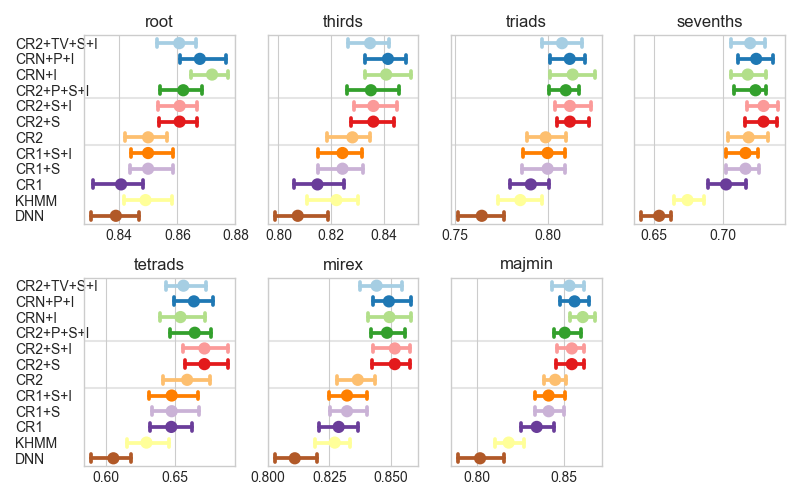

In [16]:
P = sns.pointplot

plt.figure(figsize=(8, 5))

for i, tab in enumerate(['root', 'thirds', 'triads', 'sevenths', 'tetrads', 'mirex', 'majmin'], 1):
    ax = plt.subplot(2,4,i)
    P(data=results_inv[:,:,tab], orient='h', join=False, palette='Paired', capsize=0.5, estimator=np.median)
    plt.axhline(6.5, alpha=0.1, zorder=-1, color='k')
    plt.axhline(3.5, alpha=0.1, zorder=-1, color='k')
    plt.title(tab)
    
    
    if i % 4 != 1:
        plt.yticks([])
    else:
        
        labs = ax.yaxis.get_ticklabels()
        ax.yaxis.set_ticklabels(labs, ha='left')
        ax.yaxis.set_tick_params(pad=50)
    
plt.tight_layout()

if SAVE:
    plt.savefig('/home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf', transparent=True, pad_inches=0)
    !convert /home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf /home/bmcfee/git/chord_models/paper/figs/crnn-scores.eps

<IPython.core.display.Javascript object>


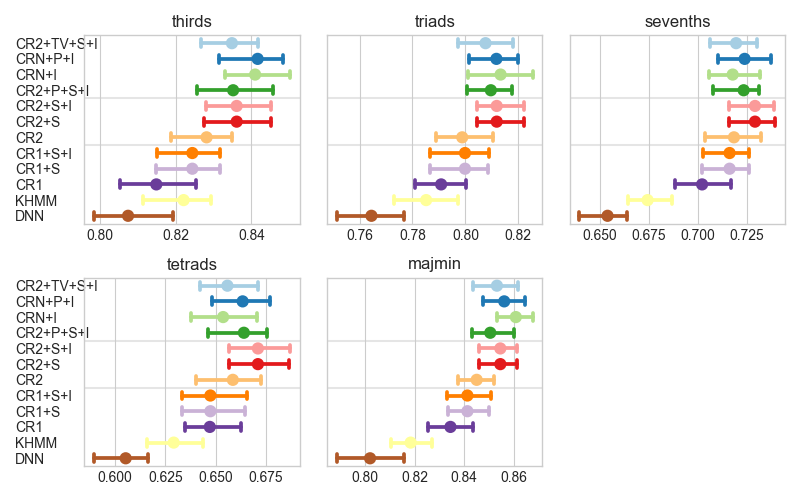

In [17]:
P = sns.pointplot

plt.figure(figsize=(8, 5))

for i, tab in enumerate(['thirds', 'triads', 'sevenths', 'tetrads', 'majmin'], 1):
    ax = plt.subplot(2,3,i)
    P(data=results_inv[:,:,tab], orient='h', join=False, palette='Paired', capsize=0.5, estimator=np.median)
    plt.axhline(6.5, alpha=0.1, zorder=-1, color='k')
    plt.axhline(3.5, alpha=0.1, zorder=-1, color='k')
    plt.title(tab)
    
    
    if i % 3 != 1:
        plt.yticks([])
    else:
        
        labs = ax.yaxis.get_ticklabels()
        ax.yaxis.set_ticklabels(labs, ha='left')
        ax.yaxis.set_tick_params(pad=50)
    
plt.tight_layout()

if SAVE:
    plt.savefig('/home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf', transparent=True, pad_inches=0)
    !convert /home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf /home/bmcfee/git/chord_models/paper/figs/crnn-scores.eps

In [18]:
results.minor_axis

Index(['majmin', 'majmin_inv', 'mirex', 'root', 'sevenths', 'sevenths_inv',
       'tetrads', 'tetrads_inv', 'thirds', 'thirds_inv', 'triads',
       'triads_inv'],
      dtype='object')

<IPython.core.display.Javascript object>


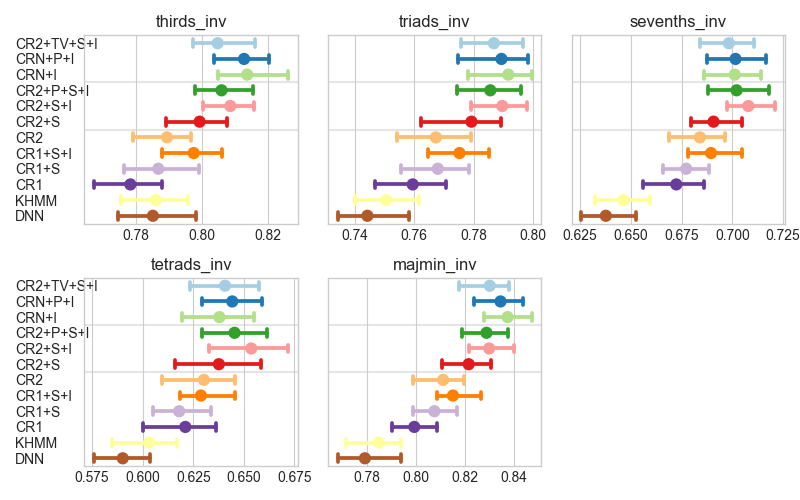

In [19]:
P = sns.pointplot

plt.figure(figsize=(8, 5))

for i, tab in enumerate(['thirds_inv', 'triads_inv', 'sevenths_inv', 'tetrads_inv', 'majmin_inv'], 1):
    ax = plt.subplot(2,3,i)
    P(data=results_inv[:,:,tab], orient='h', join=False, palette='Paired', capsize=0.5, estimator=np.median)
    plt.axhline(5.5, alpha=0.1, zorder=-1, color='k')
    plt.axhline(2.5, alpha=0.1, zorder=-1, color='k')
    plt.title(tab)
    
    
    if i % 3 != 1:
        plt.yticks([])
    else:
        
        labs = ax.yaxis.get_ticklabels()
        ax.yaxis.set_ticklabels(labs, ha='left')
        ax.yaxis.set_tick_params(pad=50)
    
plt.tight_layout()

if SAVE:
    plt.savefig('/home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf', transparent=True, pad_inches=0)
    !convert /home/bmcfee/git/chord_models/paper/figs/crnn-scores.pdf /home/bmcfee/git/chord_models/paper/figs/crnn-scores.eps

In [20]:
results.minor_xs('tetrads').median().sort_values()

Chordino      0.375069
DNN           0.605367
KHMM          0.629209
CR1           0.647136
CR1+S         0.647422
CR1+S+I       0.647422
CRN+I         0.653745
CR2+TV+S+I    0.655879
CR2           0.658558
CRN+P+I       0.663436
CR2+P+S+I     0.664053
CR2+S         0.671017
CR2+S+I       0.671017
dtype: float64

In [21]:
results.minor_xs('tetrads_inv').median().sort_values()

Chordino      0.346537
DNN           0.590227
KHMM          0.603216
CR1+S         0.618071
CR1           0.621109
CR1+S+I       0.628805
CR2           0.630288
CR2+S         0.637683
CRN+I         0.637937
CR2+TV+S+I    0.640705
CRN+P+I       0.644286
CR2+P+S+I     0.645413
CR2+S+I       0.653672
dtype: float64